In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Set plotting style
sns.set_style("whitegrid")

# Load the datasets
train_df = pd.read_csv('train (1).csv')
test_df = pd.read_csv('test (1).csv')

print("--- Training Data Info ---")
print(train_df.info())
print("\n--- Training Data Head ---")
print(train_df.head())

--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float6

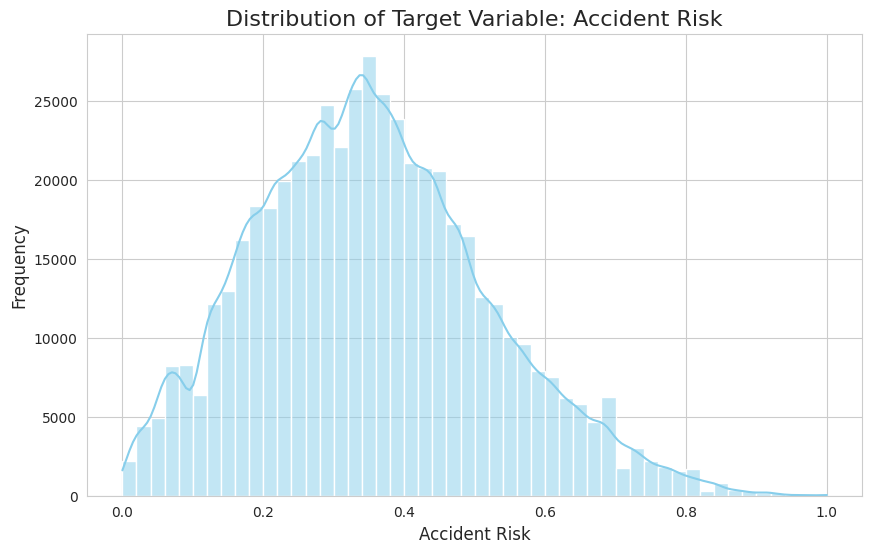

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'train_df' is already loaded and contains the necessary columns

# NOTE: The 'plt.close()' and 'plt.savefig()' lines have been removed to display plots inline.

## Plot 1: Target Variable Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['accident_risk'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Target Variable: Accident Risk', fontsize=16)
plt.xlabel('Accident Risk', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show() # Use plt.show() to explicitly display the figure if not in an interactive environment



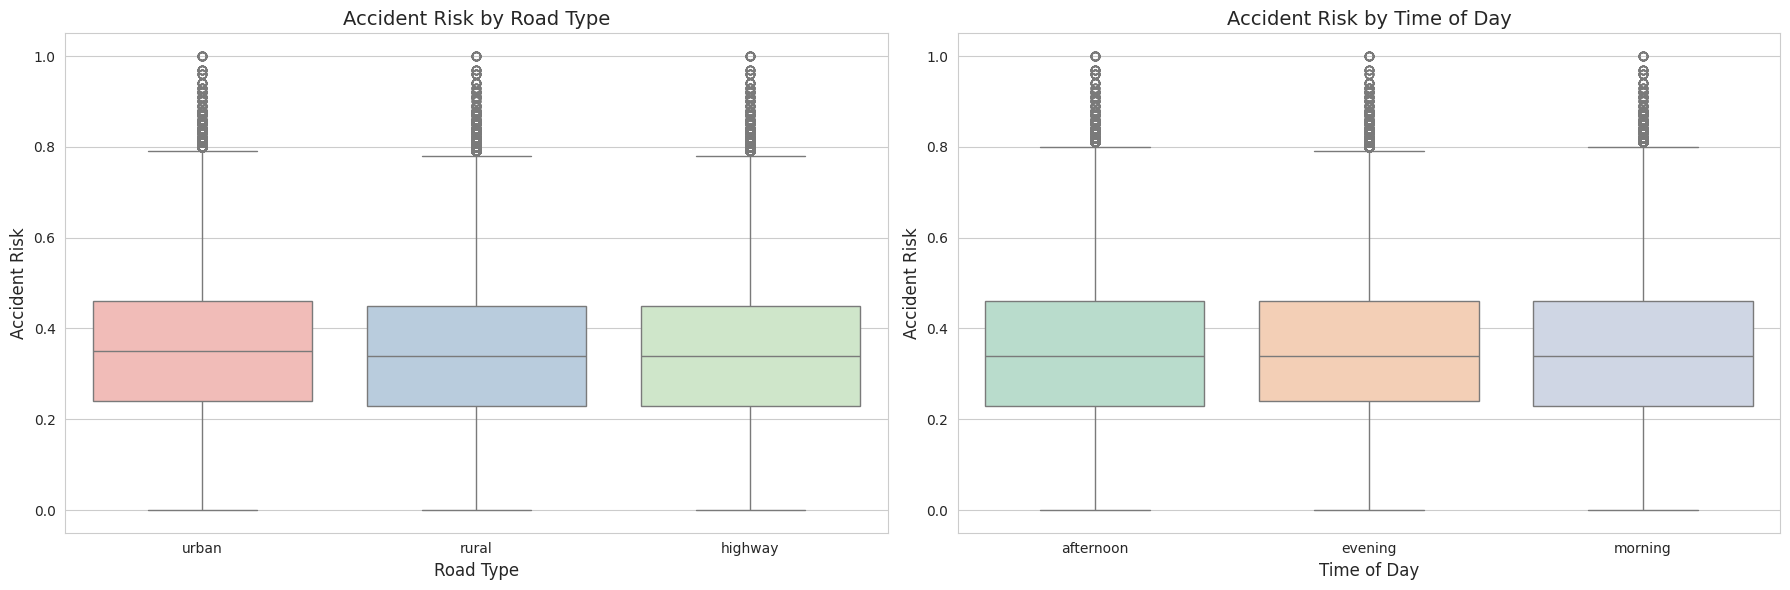

In [11]:
## Plot 2: Relationship with Categorical Features (road_type and time_of_day)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# MODIFIED: Added hue='road_type' and legend=False
sns.boxplot(x='road_type', y='accident_risk', data=train_df, ax=axes[0], palette='Pastel1', hue='road_type', legend=False)
axes[0].set_title('Accident Risk by Road Type', fontsize=14)
axes[0].set_xlabel('Road Type', fontsize=12)
axes[0].set_ylabel('Accident Risk', fontsize=12)

# MODIFIED: Added hue='time_of_day' and legend=False
sns.boxplot(x='time_of_day', y='accident_risk', data=train_df, ax=axes[1], palette='Pastel2', hue='time_of_day', legend=False)
axes[1].set_title('Accident Risk by Time of Day', fontsize=14)
axes[1].set_xlabel('Time of Day', fontsize=12)
axes[1].set_ylabel('Accident Risk', fontsize=12)

plt.tight_layout()
plt.show()

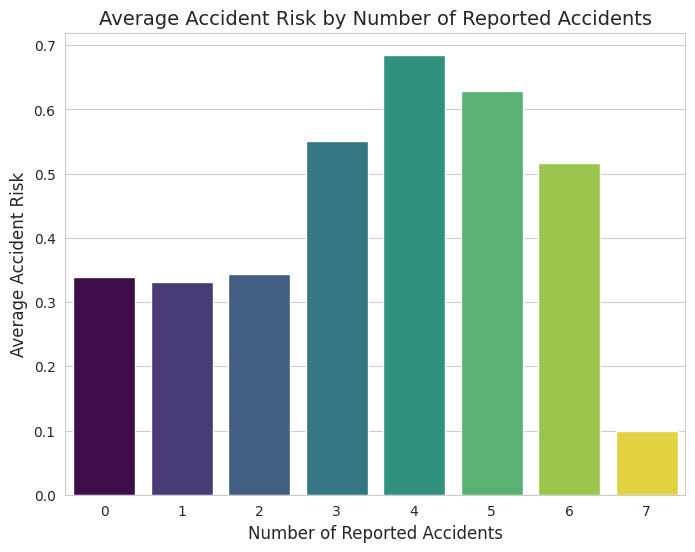

In [10]:
# Plot 3: Relationship with a Numerical Feature (num_reported_accidents)
temp_df = train_df.groupby('num_reported_accidents')['accident_risk'].mean().reset_index()

plt.figure(figsize=(8, 6))
# MODIFIED line to include hue and legend=False
sns.barplot(x='num_reported_accidents', y='accident_risk', data=temp_df, palette='viridis', hue='num_reported_accidents', legend=False)
plt.title('Average Accident Risk by Number of Reported Accidents', fontsize=14)
plt.xlabel('Number of Reported Accidents', fontsize=12)
plt.ylabel('Average Accident Risk', fontsize=12)
plt.show()

In [5]:
# Separate target variable and IDs
y_train = train_df['accident_risk']
train_ids = train_df['id']
test_ids = test_df['id']

# Drop the id and target columns from training set, and id from test set
X_train = train_df.drop(['id', 'accident_risk'], axis=1)
X_test = test_df.drop('id', axis=1)

# Concatenate train and test data for unified preprocessing
combined_df = pd.concat([X_train, X_test], ignore_index=True)

# Convert boolean columns to integer (0 or 1)
bool_cols = combined_df.select_dtypes(include='bool').columns
for col in bool_cols:
    combined_df[col] = combined_df[col].astype(int)

# Identify nominal categorical columns
nominal_cols = combined_df.select_dtypes(include='object').columns

# Apply One-Hot Encoding
combined_df_encoded = pd.get_dummies(combined_df, columns=nominal_cols, drop_first=False)

# Split back into training and test sets
X_train_processed = combined_df_encoded.iloc[:len(X_train)]
X_test_processed = combined_df_encoded.iloc[len(X_train):]

print(f"Processed training shape: {X_train_processed.shape}")
print(f"Processed test shape: {X_test_processed.shape}")

Processed training shape: (517754, 20)
Processed test shape: (172585, 20)


In [6]:
# 4. Model Training

# Initialize the Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, # Number of trees
                            max_depth=10,    # Max depth for regularization
                            random_state=42,
                            n_jobs=-1)       # Use all available cores

print("Starting model training...")
# Train the model
rfr.fit(X_train_processed, y_train)
print("Model training complete.")

# 5. Prediction and Submission

# Make predictions on the test set
predictions = rfr.predict(X_test_processed)

# Clip predictions to the required [0, 1] range
predictions_clipped = np.clip(predictions, 0, 1)

# Create the submission DataFrame
submission_df = pd.DataFrame({
    'id': test_ids,
    'accident_risk': predictions_clipped
})

# Save the submission file
submission_file_name = 'kaggle_playground_submission.csv'
submission_df.to_csv(submission_file_name, index=False)

print(f"\nSubmission file '{submission_file_name}' successfully generated.")
print("First 5 predictions:")
print(submission_df.head())

Starting model training...
Model training complete.

Submission file 'kaggle_playground_submission.csv' successfully generated.
First 5 predictions:
       id  accident_risk
0  517754       0.300036
1  517755       0.121649
2  517756       0.178312
3  517757       0.324186
4  517758       0.408583
